# # Análise de Assinaturas de Banda Larga Fixa - Banco Mundial
# 
# Este notebook realiza o tratamento dos dados de assinaturas de banda larga fixa obtidos do Banco Mundial.

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [12]:
# configuração de visualização
plt.style.use('ggplot')
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 20)

# ## 1. Carregamento dos dados

In [4]:
# Carregar o arquivo CSV
fixedbb_df = pd.read_csv('../data/raw/fixedBroadband/44d80493-94ea-49af-93eb-b9538fb7106a_Data.csv')
fixedbb_df.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],...,2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Fixed broadband subscriptions,IT.NET.BBND,Afghanistan,AFG,..,..,7070,...,16000,19700,26600,26600,32299.9999999999,33200,..
1,Fixed broadband subscriptions,IT.NET.BBND,Albania,ALB,..,..,243000,...,362000,436000,509000,559000,585000,632000,..
2,Fixed broadband subscriptions,IT.NET.BBND,Algeria,DZA,..,..,2270000,...,3070000,3580000,3790000,4179999.99999999,4710000,5540000,..
3,Fixed broadband subscriptions,IT.NET.BBND,American Samoa,ASM,..,..,..,...,..,..,..,..,..,..,..
4,Fixed broadband subscriptions,IT.NET.BBND,Andorra,AND,..,..,30700,...,35700,36400,37700,39400,40800,41800,..


In [13]:
# Limpeza inicial
# Remover colunas/linhas vazias e metadados
fixedbb_df = fixedbb_df.dropna(how='all', axis=1)  # Colunas vazias
fixedbb_df = fixedbb_df.dropna(how='all')          # Linhas vazias
fixedbb_df = fixedbb_df[~fixedbb_df['Series Name'].isna()] # Linhas de metadados

In [14]:
argentina = fixedbb_df[fixedbb_df['Country Name'] == 'Argentina'].copy()
print(f"Dados da Argentina: {argentina.shape[0]} linha(s) encontrada(s)")

Dados da Argentina: 1 linha(s) encontrada(s)


In [16]:
# Selecionar colunas de ano (formato: "2020 [YR2020]")
year_cols = [col for col in argentina.columns if 'YR' in col]

# Simplificar nomes das colunas (remove "[YRXXXX]")
argentina.columns = [col.split(' [')[0] if ' [' in col else col for col in argentina.columns]
year_cols = [col.split(' [')[0] for col in year_cols]  # Atualiza lista

# Converter valores ".." para NaN e depois para numérico
argentina[year_cols] = argentina[year_cols].replace('..', np.nan)
argentina[year_cols] = argentina[year_cols].apply(pd.to_numeric)

/var/folders/_w/7cw3691n0kd6pjct_9q417fr0000gn/T/ipykernel_5060/2178477518.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  argentina[year_cols] = argentina[year_cols].replace('..', np.nan)


In [17]:
argentina_long = argentina.melt(
    id_vars=['Series Name', 'Country Name'],
    value_vars=year_cols,
    var_name='Ano',
    value_name='Assinaturas'
).dropna()

# Converter ano para inteiro
argentina_long['Ano'] = argentina_long['Ano'].astype(int)

# Ordenar por ano
argentina_long = argentina_long.sort_values('Ano')

# Resultado
display(argentina_long.head())

,Series Name,Country Name,Ano,Assinaturas
2,Fixed broadband subscriptions,Argentina,2015,6860000.0
3,Fixed broadband subscriptions,Argentina,2016,7250000.0
4,Fixed broadband subscriptions,Argentina,2017,7840000.0
5,Fixed broadband subscriptions,Argentina,2018,8470000.0
6,Fixed broadband subscriptions,Argentina,2019,8790000.0


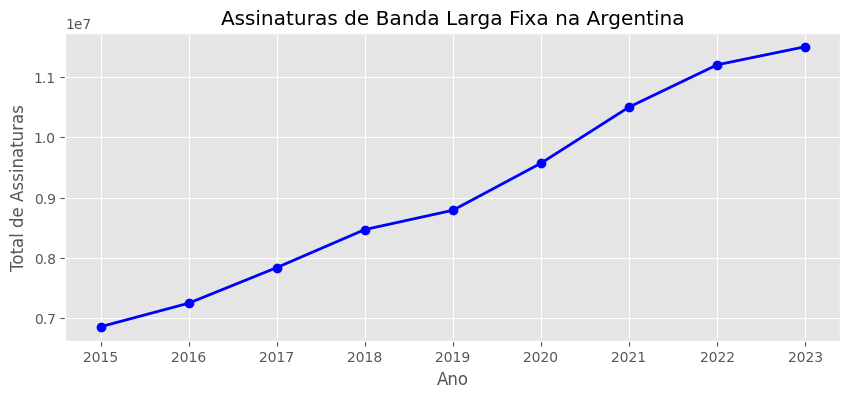

In [ ]:
# Visualização dos dados no Jupyter notebook antes de extrai-lo em arquivo CSV

plt.figure(figsize=(10, 4))
plt.plot(argentina_long['Ano'], argentina_long['Assinaturas'], 'b-o', linewidth=2)
plt.title('Assinaturas de Banda Larga Fixa na Argentina')
plt.xlabel('Ano')
plt.ylabel('Total de Assinaturas')
plt.grid(True)
plt.show()

In [19]:
# Extrair dados para CSV
output_dir = '../data/processed/fixedBroadband'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'argentina_fixed_broadband.csv')
argentina_long.to_csv(output_file, index=False)
print(f"Dados exportados para {output_file}")

Dados exportados para ../data/processed/fixedBroadband/argentina_fixed_broadband.csv
